<a href="https://colab.research.google.com/github/MartinMashalov/TechnicalAnalysisTrends/blob/main/TechnicalAnalysisExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# package installation 
!pip install yfinance
!pip install pandas-ta
!pip install hampel

## Signal Processing and Smoothing

## Fetch Data and Plot



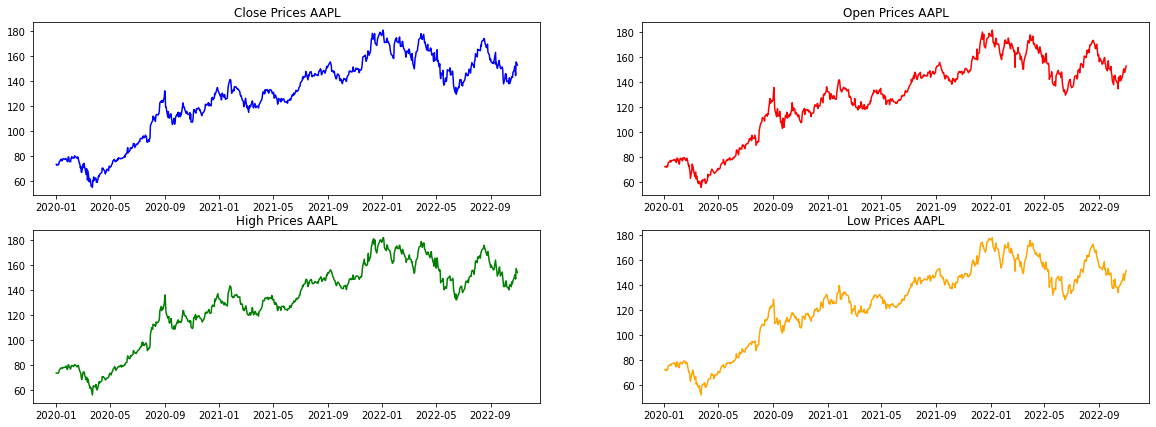

In [2]:
# fetch stock data from yfinance
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import yfinance as yf
import pandas_ta as pd_ta
from tqdm import tqdm 

# data download
ticker: str = 'AAPL'
start = '2020-01-01'
end = "2022-11-01"
df = yf.Ticker(ticker).history(interval='1d', start=start, end=end).drop(['Dividends', 'Stock Splits'], axis=1)

# configure plot settings 
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20, 7)

# plot each independent variable
ax[0, 0].plot(df['Close'], color='b')
ax[0, 0].set_title("Close Prices AAPL")
ax[0, 1].plot(df['Open'], color='r')
ax[0, 1].set_title("Open Prices AAPL")
ax[1, 0].plot(df['High'], color='g')
ax[1, 0].set_title("High Prices AAPL")
ax[1, 1].plot(df['Low'], color='orange')
ax[1, 1].set_title("Low Prices AAPL")
plt.show()

## LOESS

100%|██████████| 5/5 [00:00<00:00, 15.42it/s]


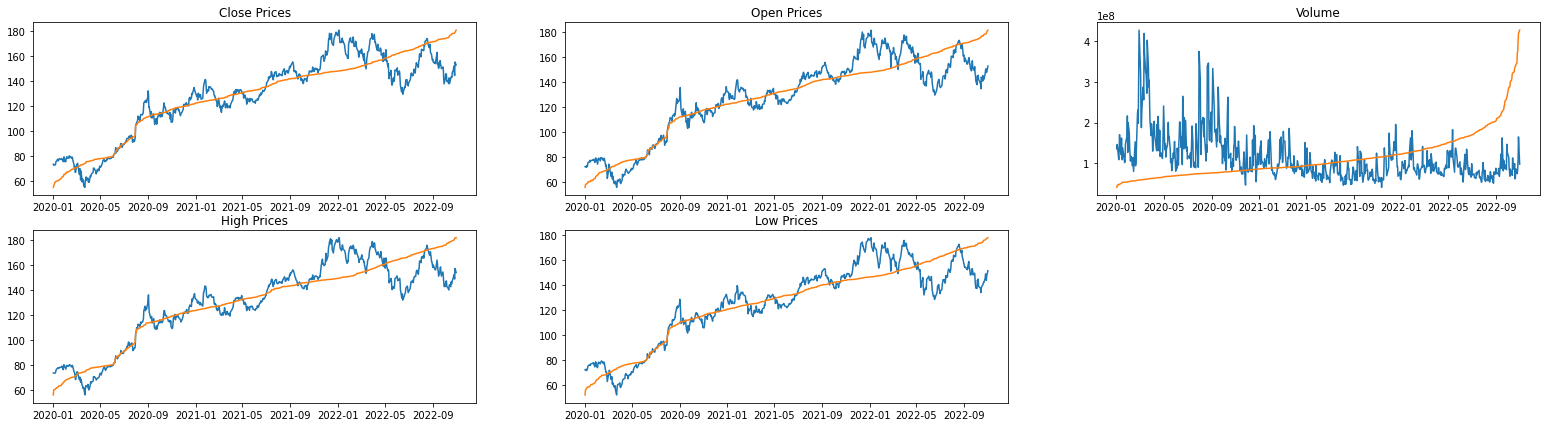

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

# variable index
var_idx: dict = {'Close': [0, 0], 'Open': [0, 1], 'High': [1, 0], 'Low': [1, 1], 'Volume': [0, 2]}
color_idx: dict = {'Close': 'blue', 'Open': 'red', 'High': 'green', 'Low': 'orange'}

# fetch lowess function from statsmodels index
lowess = sm.nonparametric.lowess

# configure plot settings 
fig, ax = plt.subplots(2, 3)
ax[1][2].set_visible(False)
fig.set_size_inches(27, 7)

for var in tqdm(list(var_idx.keys())): 
  # compute the loess function
  x = df[var].to_numpy()
  y = np.sin(x) + stats.cauchy.rvs(size=len(x))
  z1 = lowess(y, x, frac=0.1, it=1) # frac is the free variable with int regulating accuracy measure

  # place in pandas dataframe
  df['z1'] = z1[:, 0]

  # plotting 
  ax[var_idx[var][0], var_idx[var][1]].plot(df[[var, 'z1']])
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f"{var}")
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f"{var} Prices")

## Hampel Filter

100%|██████████| 5/5 [00:00<00:00,  9.82it/s]


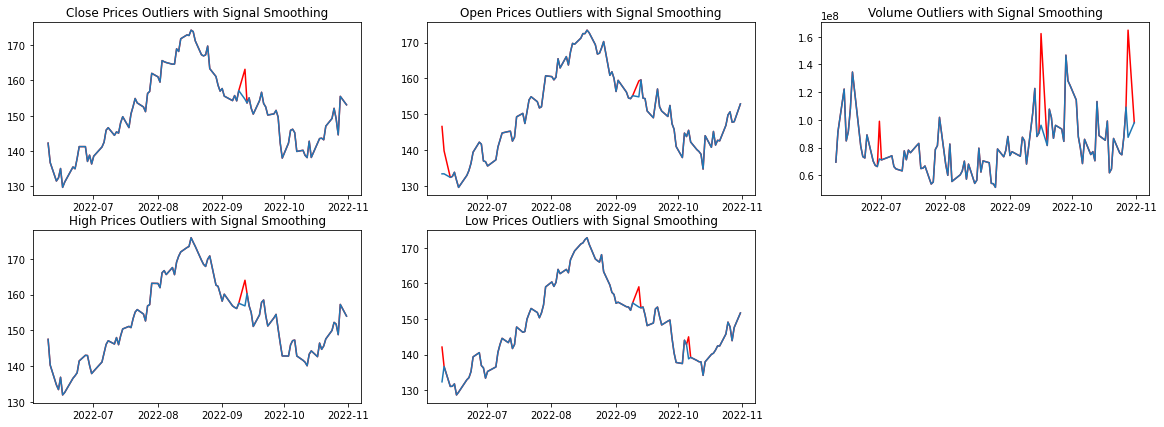

In [4]:
from hampel import hampel

history: int = 100
outlier_detection: bool = True

# configure plot settings 
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 7)
ax[1][2].set_visible(False)

for var in tqdm(list(var_idx.keys())): 
  ts = df[var][-history:]
  outlier_indices = hampel(ts, window_size=10, n=5)
  #print("Outlier Indices: ", outlier_indices)

  # outlier imputation with rolling median included
  ts_imputation = hampel(ts, window_size=5, n=3, imputation=outlier_detection)
  
  # plotitng 
  ax[var_idx[var][0], var_idx[var][1]].plot(ts, color='red')
  ax[var_idx[var][0], var_idx[var][1]].plot(ts_imputation)
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Outliers with Signal Smoothing')
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Prices Outliers with Signal Smoothing')

## Moving Average Grouping

## SMA

100%|██████████| 5/5 [00:00<00:00, 85.69it/s]


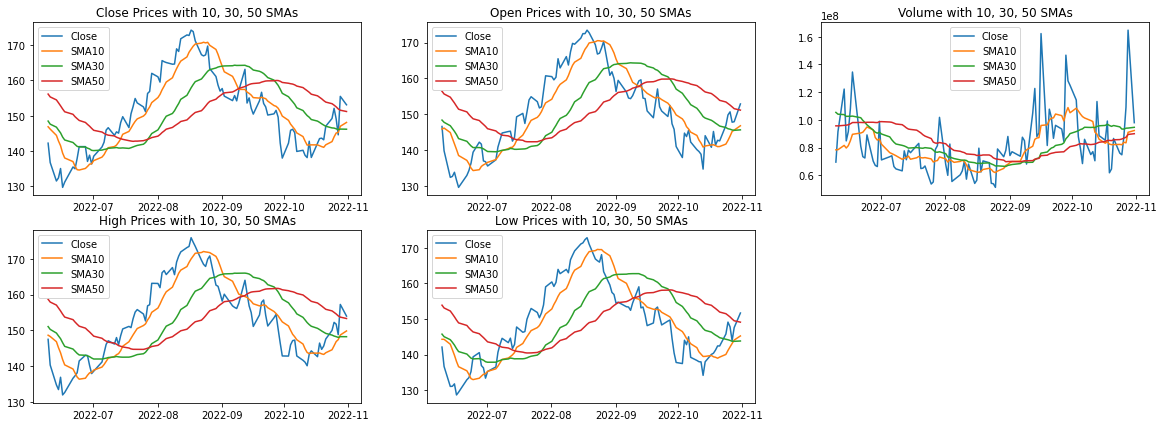

In [5]:
history: int = 100

# configure plot settings 
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 7)
ax[1][2].set_visible(False)

for var in tqdm(list(var_idx.keys())): 
  # create moving average series
  df['SMA10'] = df[var].rolling(10, min_periods=1).mean()
  df['SMA50'] = df[var].rolling(50, min_periods=1).mean()
  df['SMA30'] = df[var].rolling(30, min_periods=1).mean()

  ax[var_idx[var][0], var_idx[var][1]].plot(df[[var]][-history:], label='Close')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['SMA10']][-history:], label='SMA10')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['SMA30']][-history:], label='SMA30')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['SMA50']][-history:], label='SMA50')
  ax[var_idx[var][0], var_idx[var][1]].legend()
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} with 10, 30, 50 SMAs')
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Prices with 10, 30, 50 SMAs')

## CMA

100%|██████████| 5/5 [00:00<00:00, 97.16it/s]


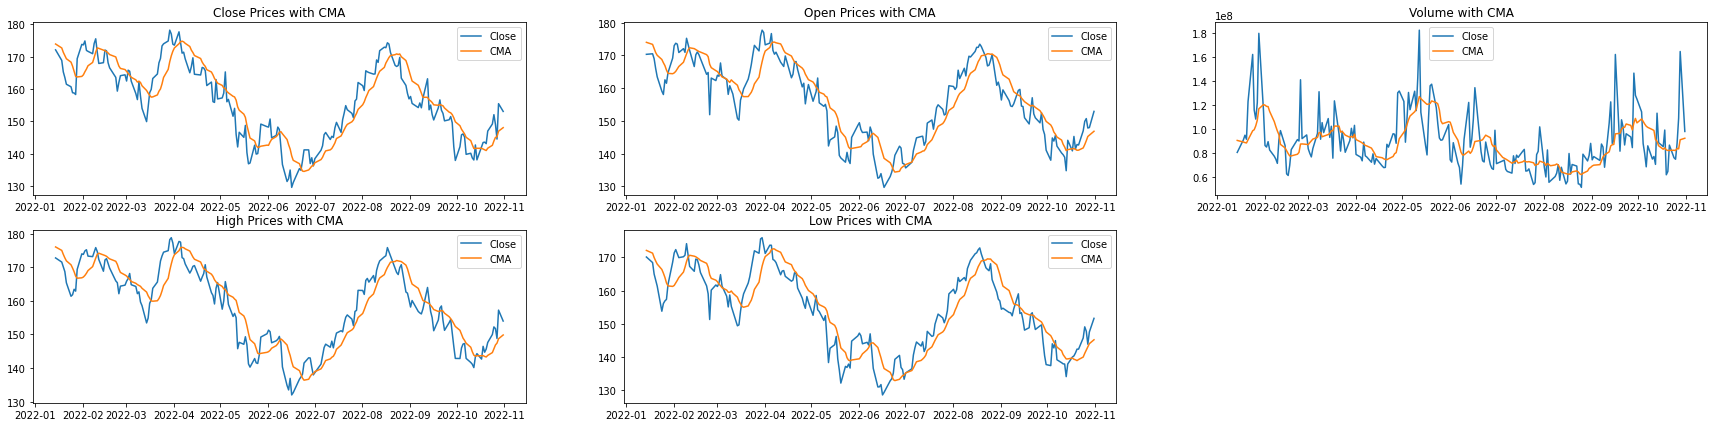

In [6]:
history: int = 200

# configure plot settings 
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(30, 7)
ax[1][2].set_visible(False)

for var in tqdm(list(var_idx.keys())): 
  # create moving average series
  df['CMA'] = df[var].rolling(10, min_periods=1).mean()

  ax[var_idx[var][0], var_idx[var][1]].plot(df[[var]][-history:], label='Close')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['CMA']][-history:], label='CMA')
  ax[var_idx[var][0], var_idx[var][1]].legend()
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} with CMA')
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Prices with CMA')

## WMA

100%|██████████| 5/5 [00:00<00:00, 23.91it/s]


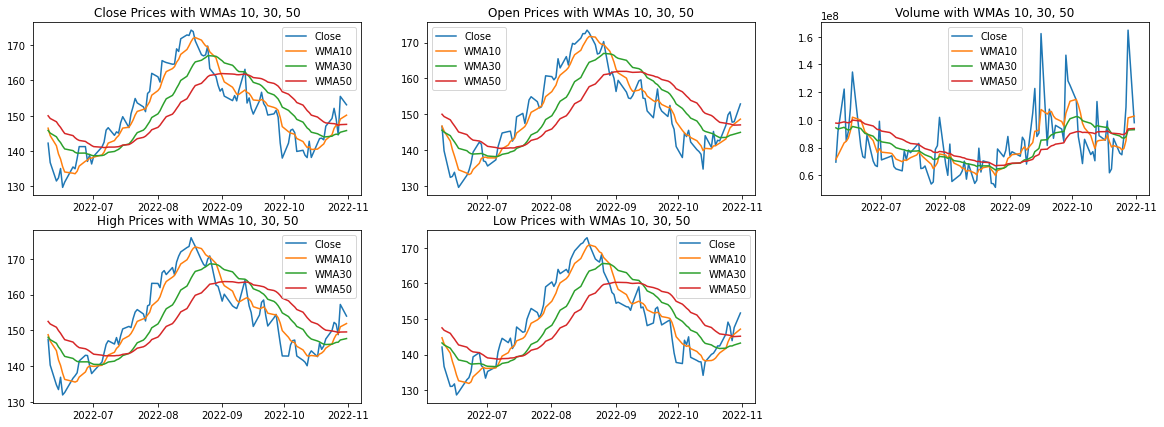

In [7]:
history: int = 100

def wma(df, var, period=10):
  """weighted moving average funcvtion"""
  weights = np.arange(period)
  df[f'WMA{period}'] = df[var].rolling(period).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
  return df

# configure plot settings 
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 7)
ax[1][2].set_visible(False)

for var in tqdm(list(var_idx.keys())): 
  # create moving average series
  df = wma(df, var, period=10)
  df = wma(df, var, period=30)
  df = wma(df, var, period=50)

  # plot all ma's on subplots
  ax[var_idx[var][0], var_idx[var][1]].plot(df[[var]][-history:], label='Close')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['WMA10']][-history:], label='WMA10')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['WMA30']][-history:], label='WMA30')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['WMA50']][-history:], label='WMA50')
  ax[var_idx[var][0], var_idx[var][1]].legend()
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} with WMAs 10, 30, 50')
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Prices with WMAs 10, 30, 50')

## HMA (Hull)

100%|██████████| 5/5 [00:01<00:00,  4.91it/s]


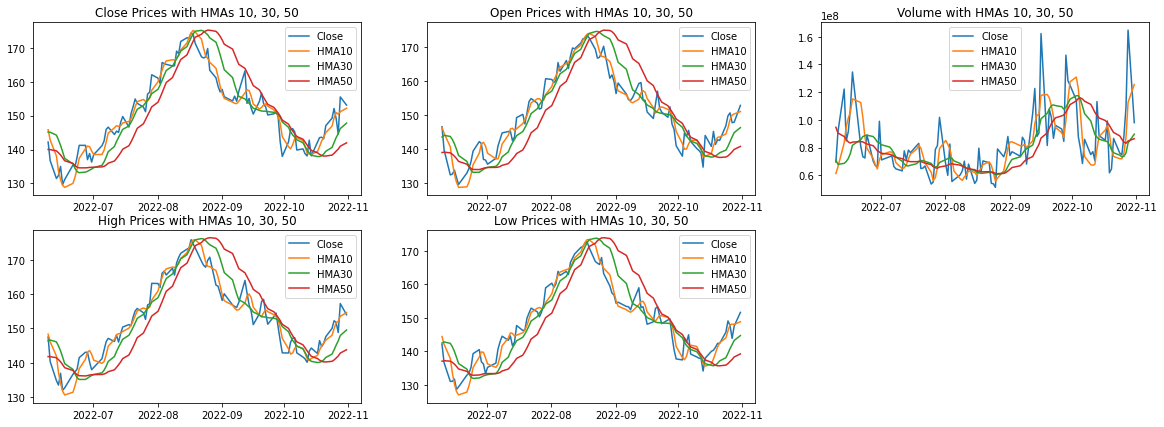

In [8]:
history: int = 100

def hma(df, var, period=10): 
  """hull moving average function"""
  df[f'HMA{period}'] = df[var].rolling(period//2).apply(lambda x: ((np.arange(period//2) + 1)*x).sum()/(np.arange(period//2) + 1).sum(), raw=True).multiply(2).sub(
                        df[var].rolling(period).apply(lambda x: ((np.arange(period) + 1)*x).sum()/(np.arange(period) + 1).sum(), raw=True)
                ).rolling(int(np.sqrt(period))).apply(lambda x: ((np.arange(int(np.sqrt(period))) + 1)*x).sum()/(np.arange(int(np.sqrt(period))) + 1).sum(), raw=True)
  return df

# configure plot settings 
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 7)
ax[1][2].set_visible(False)

for var in tqdm(list(var_idx.keys())): 
  # create moving average series
  df = hma(df, var, period=10)
  df = hma(df, var, period=30)
  df = hma(df, var, period=50)

  # plot all ma's on subplots
  ax[var_idx[var][0], var_idx[var][1]].plot(df[[var]][-history:], label='Close')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['HMA10']][-history:], label='HMA10')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['HMA30']][-history:], label='HMA30')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['HMA50']][-history:], label='HMA50')
  ax[var_idx[var][0], var_idx[var][1]].legend()
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} with HMAs 10, 30, 50')
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Prices with HMAs 10, 30, 50')

## Savitzky-Golay Filter

100%|██████████| 5/5 [00:00<00:00, 29.13it/s]


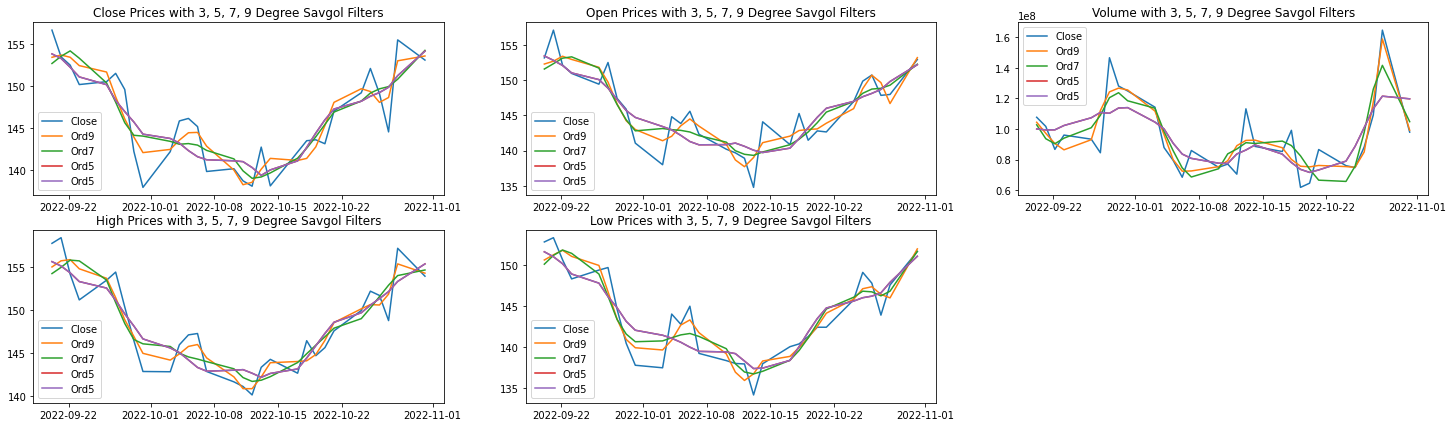

In [9]:
from scipy.signal import savgol_filter

# configure global settings
history: int = 30

# configure plot settings 
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(25, 7)
ax[1][2].set_visible(False)

for var in tqdm(list(var_idx.keys())): 
  # create moving average series
  df['Ord9'] = savgol_filter(df[var], 21, 9)
  df['Ord7'] = savgol_filter(df[var], 21, 7)
  df['Ord5'] = savgol_filter(df[var], 21, 5)
  df['Ord3'] = savgol_filter(df[var], 21, 3)

  # plot all ma's on subplots
  ax[var_idx[var][0], var_idx[var][1]].plot(df[[var]][-history:], label='Close')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['Ord9']][-history:], label='Ord9')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['Ord7']][-history:], label='Ord7')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['Ord5']][-history:], label='Ord5')
  ax[var_idx[var][0], var_idx[var][1]].plot(df[['Ord5']][-history:], label='Ord5')
  ax[var_idx[var][0], var_idx[var][1]].legend()
  if var == 'Volume': 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} with 3, 5, 7, 9 Degree Savgol Filters')
  else: 
    ax[var_idx[var][0], var_idx[var][1]].set_title(f'{var} Prices with 3, 5, 7, 9 Degree Savgol Filters')

## Hurst Exponent Analysis

## Hurst Exponent to Quantify Reversion

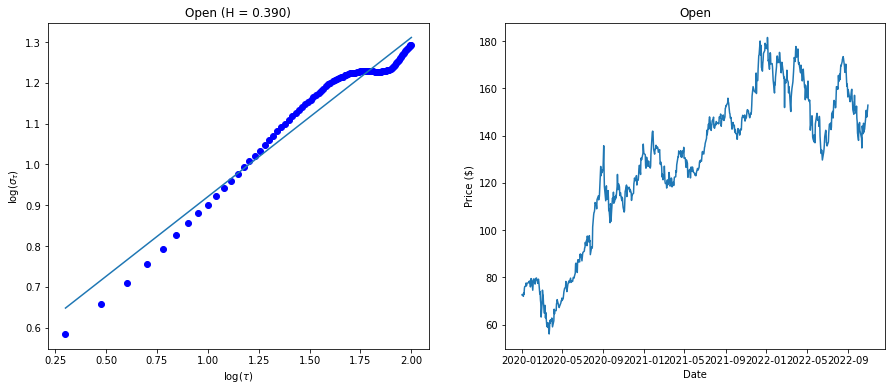

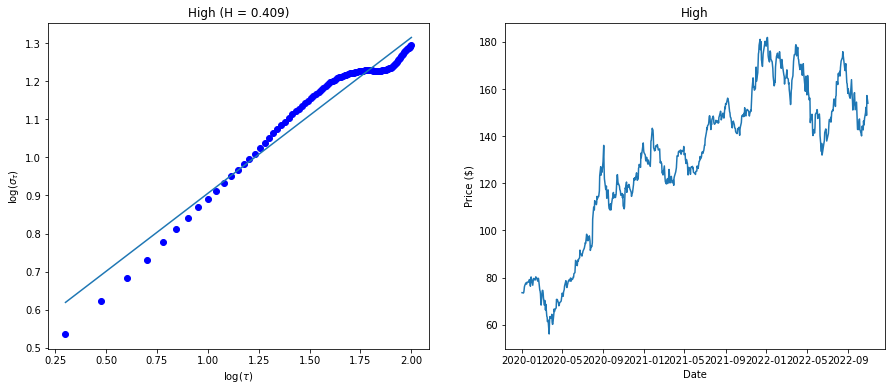

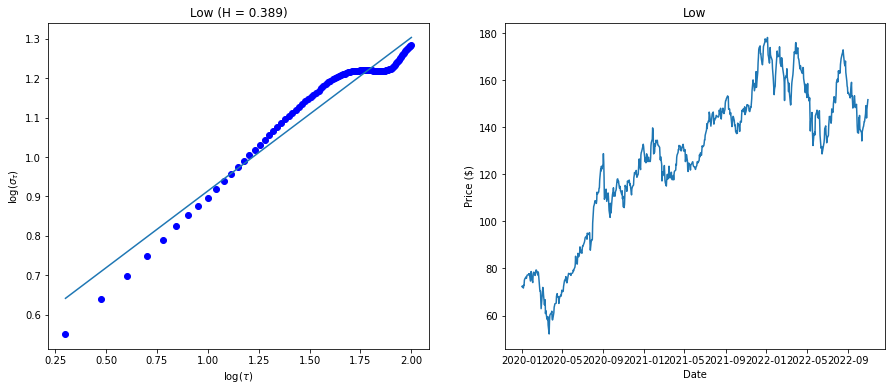

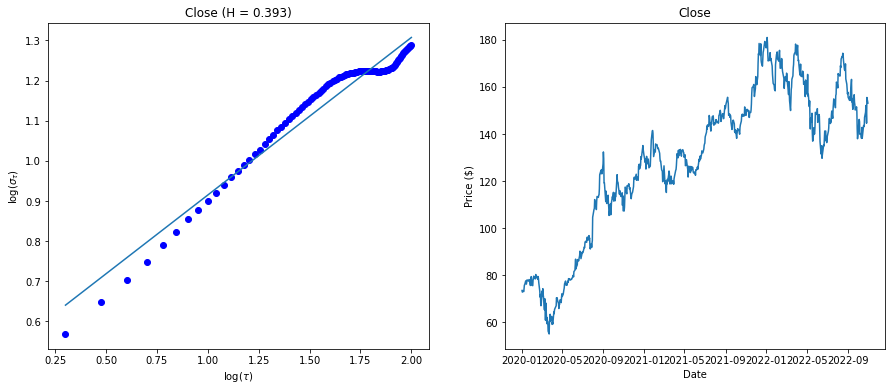

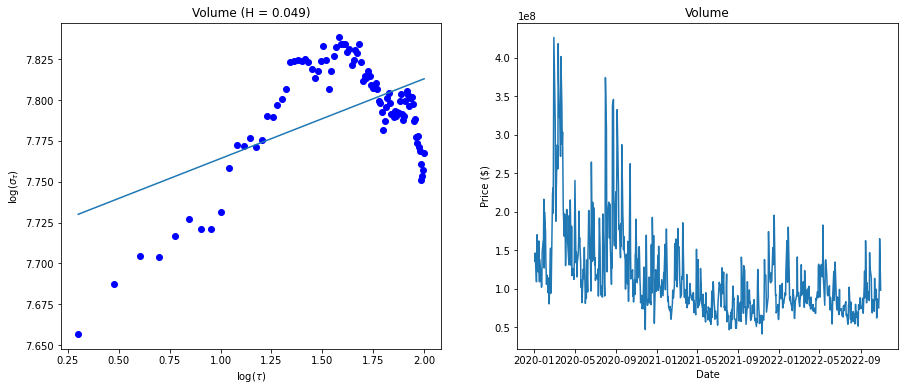

In [16]:
def hurst(price, min_lag=2, max_lag=100):
  lags = np.arange(min_lag, max_lag + 1)
  tau = [np.std(np.subtract(price[lag:], price[:-lag])) 
    for lag in lags]
  m = np.polyfit(np.log10(lags), np.log10(tau), 1)
  return m, lags, tau

def plotHurst(m, x, y, series, name):
  fig, ax = plt.subplots(1, 2, figsize=(15, 6))
  ax[0].plot(np.log10(x), m[0] * np.log10(x) + m[1]) 
  ax[0].scatter(np.log10(x), np.log10(y), c="b")
  ax[0].set_title(f"{name} (H = {m[0]:.3f})")
  ax[0].set_xlabel(r"log($\tau$)")
  ax[0].set_ylabel(r"log($\sigma_\tau$)")

  ax[1].plot(series)
  ax[1].set_title(f"{name}")
  ax[1].set_ylabel("Price ($)")
  ax[1].set_xlabel("Date")

  return fig, ax

df = df[['Open', "High", "Low", "Close", 'Volume']]
vals = {c: hurst(df[c].dropna().values, max_lag=100) for c in df.columns}
for k, v in vals.items():
  fig, ax = plotHurst(*v, df[k], k)
  plt.show()

 23%|██▎       | 702/2990 [00:11<00:54, 41.97it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
100%|██████████| 2990/2990 [02:38<00:00, 18.85it/s]


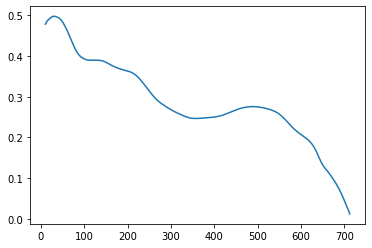

In [26]:
hurst_exps: list = []
for lag in tqdm([i for i in range(10, 3000)]): 
  exp = hurst(df['Close'].values, max_lag=lag)[0][0]
  hurst_exps.append(exp)
plt.plot([i for i in range(10, 3000)], hurst_exps)